##1. 라이브러리 및 패키지 불러오기

In [4]:
import numpy as np # 행렬 연산 / 데이터 핸들링
import pandas as pd # 데이터 분석
import matplotlib.pyplot as plt # 그래프 시각화
import seaborn as sns # 그래프 시각화

In [5]:
from sklearn.preprocessing import LabelEncoder # 라벨 인코더
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

In [8]:
join = pd.read_csv('/content/drive/MyDrive/2022_Bigcontest/Data/Preprocessing+loan.csv')
join.head()

,Unnamed: 0,Unnamed: 0.1,application_id,user_id,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,...,existing_loan_amt,reage,career,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,clust
0,0,0,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,1
1,1,1,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,1
2,2,2,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,0
3,3,3,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,3
4,4,4,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,2


In [9]:
join = join.drop(['Unnamed: 0', "Unnamed: 0.1"], axis = 1)

# 2. 전처리

In [10]:
join_final = join

In [11]:
join_final = join_final.drop(['application_id', 'user_id', 'loanapply_insert_time', 'is_applied','loan_rate'], axis = 1)

In [12]:
join

,application_id,user_id,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,...,existing_loan_amt,reage,career,loanapply_insert_time,bank_id,product_id,loan_limit,loan_rate,is_applied,clust
0,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,7,191,42000000.0,13.6,NaN,1
1,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,25,169,24000000.0,17.9,NaN,1
2,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,2,7,24000000.0,18.5,NaN,0
3,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,4,268,29000000.0,10.8,NaN,3
4,1748340,430982.0,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,...,15000000.0,20.0,1.0,2022-06-07 13:05:41,11,118,5000000.0,16.4,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527358,1428218,478802.0,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,...,56000000.0,50.0,4.0,2022-06-03 12:01:58,62,200,3000000.0,14.8,NaN,1
13527359,1428218,478802.0,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,...,56000000.0,50.0,4.0,2022-06-03 12:01:49,2,7,40000000.0,11.8,NaN,0
13527360,1428218,478802.0,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,...,56000000.0,50.0,4.0,2022-06-03 12:01:48,32,257,15000000.0,7.2,NaN,3
13527361,1428218,478802.0,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,...,56000000.0,50.0,4.0,2022-06-03 12:01:48,33,110,44000000.0,13.5,NaN,2


##1) loan_limit

###1) 전처리

In [13]:
join_train = join_final[join_final['loan_limit'].notnull()]

In [14]:
join_test = join_final[join_final['loan_limit'].isnull()]

In [15]:
# 인코딩
join_train = pd.get_dummies(join_train)
join_test= pd.get_dummies(join_test)

In [16]:
data = join_train.drop('loan_limit',axis=1)
target = join_train['loan_limit']

In [17]:
standardScaler = StandardScaler()
print(standardScaler.fit(data))
data_scaled = standardScaler.transform(data)

StandardScaler()


In [18]:
X_train, X_val, y_train, y_val = train_test_split(data_scaled, target, test_size=0.3, random_state=0)

In [19]:
lgb = lgb.LGBMRegressor()
lgb.fit(X_train, y_train)
lgb_preds= lgb.predict(X_val)

In [20]:
mse = mean_squared_error(y_val, lgb_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_val,lgb_preds)))

MSE : 463785461202089.125, RMSE : 21535678.796
Variance score : 0.137


##2) 변수 중요도

In [30]:
join_train

,gender,credit_score,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,bank_id,product_id,loan_limit,clust
0,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,0.0,0.0,2.0,15000000.0,20.0,1.0,7,191,42000000.0,1
1,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,0.0,0.0,2.0,15000000.0,20.0,1.0,25,169,24000000.0,1
2,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,0.0,0.0,2.0,15000000.0,20.0,1.0,2,7,24000000.0,0
3,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,0.0,0.0,2.0,15000000.0,20.0,1.0,4,268,29000000.0,3
4,1.0,620.0,24000000.0,3.0,3,2,25000000.0,7,0.0,0.0,2.0,15000000.0,20.0,1.0,11,118,5000000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13527358,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,0.0,1.0,2.0,56000000.0,50.0,4.0,62,200,3000000.0,1
13527359,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,0.0,1.0,2.0,56000000.0,50.0,4.0,2,7,40000000.0,0
13527360,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,0.0,1.0,2.0,56000000.0,50.0,4.0,32,257,15000000.0,3
13527361,1.0,610.0,45000000.0,3.0,3,0,50000000.0,7,0.0,1.0,2.0,56000000.0,50.0,4.0,33,110,44000000.0,2


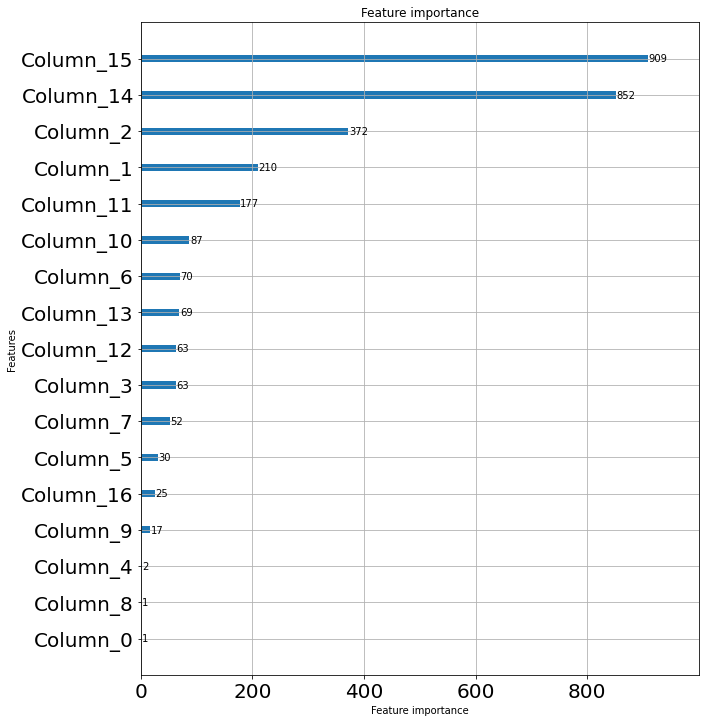

In [28]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgb, ax=ax)

###2) 적용

In [28]:
test_data = join_test.drop('loan_limit',axis=1)
target = join_test['loan_limit']

In [29]:
standardScaler = StandardScaler()
print(standardScaler.fit(join_test))
data_scaled = standardScaler.transform(join_test)

StandardScaler()


/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:985: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:990: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:1020: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count


In [ ]:
lgb_preds_test = lgb.predict(test_data)

In [ ]:
join_final.loc[(join_final['loan_limit'].isnull()), 'loan_limit'] = lgb_preds_test.round()

In [ ]:
join_final.isnull().sum()

In [ ]:
join_final.to_csv('/content/drive/MyDrive/2022_Bigcontest/Data/join_final.csv')